In [36]:
import numpy as np
import csv
import pandas as pd
import time 
import LESbplume as lp

In [37]:
#(r"D:\Ammonia_NBL_3D\NBL_3D_T_F100_600_Hot_Buoyant.csv",skiprows = sk,nrows = n, dtype =np.float32,header = None)
#(r"D:\Helium_FLUX_1\He_h01_01_T.csv",skiprows = sk,nrows = n, dtype =np.float32)

In [38]:
Start = 0 # numer of rows in dataset
End = 50 # time start

sk = Start*45*45*700
nt = End - Start
n = 45*45*700*nt
name = 'Helium_FLUX_1'
# #INPUT the path of the file
ome = pd.read_csv(r"Helium_2_lambda2.csv",skiprows = sk,nrows = n, dtype =np.float32,header = None)
omega = ome.to_numpy()
del ome
omega = np.reshape(omega, (45,45,700,nr), order="F")


dx = dy =40
dz = 10
nx, ny, nz, nt = lp.shape(omega)

In [44]:
# tic = time.perf_counter()
# t = 0
# from celluloid import Camera
# while(t<nr):
#     isosurface(omega,t)
#     ax.view_init(30,angle)
#     filename='Volcano/Volcano_step'+str(angle)+'.png'
#     plt.savefig(filename, dpi=96)
#     plt.gca()
#     t = t+5   
# print(f"Eigen: {toc1 - tic:0.4f} seconds") 

Helium2_lambda2/Helium2_lambda2_timestep15.png


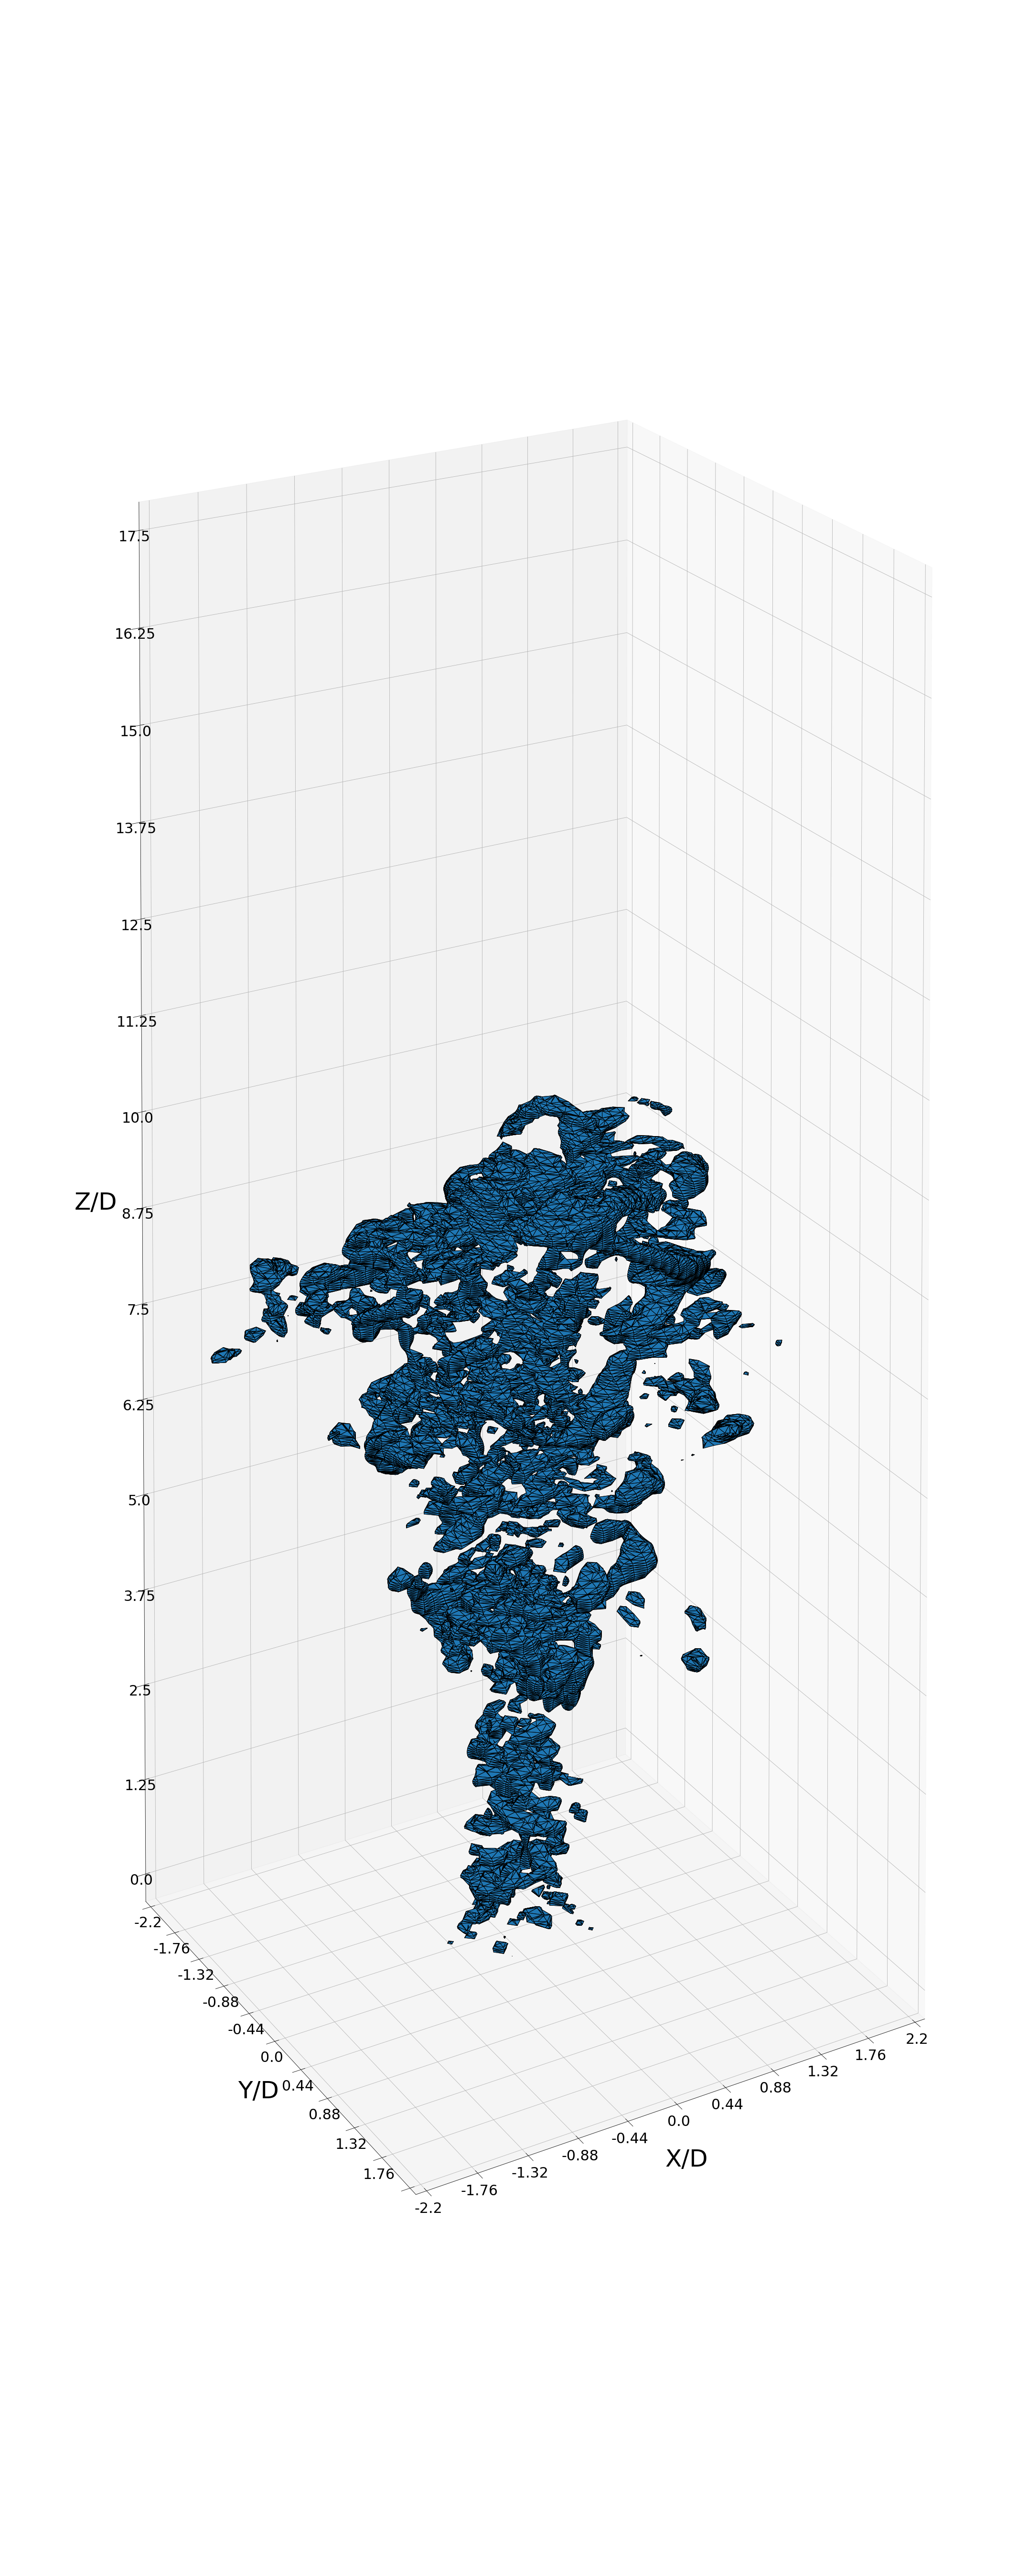

In [191]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib import animation
from skimage import measure
import time
import os

D =400
isovalue = 0.52 #omega
isovalue = -np.exp(-9) #lamda2
name = 'Helium2_lambda2'

def isosurface(data,isovalue,name, figsize =30,frame = 10):
    
    if not os.path.exists(name):
        os.makedirs(name)
    t = 0    
    while(t<nt):
        vol = data[:,:,:,t]
        verts, faces, _, _ = measure.marching_cubes_lewiner(vol, isovalue, spacing=(dx, dy, dz))
        fig = plt.figure(figsize=(figsize, figsize*2.5))
        ax = fig.add_subplot(111, projection='3d')

        mesh = Poly3DCollection(verts[faces])
        mesh.set_edgecolor('k')
        ax.add_collection3d(mesh)
        ax.view_init(10,60)

        ax.set_xlabel("X/D",fontsize = 50,labelpad=40)
        ax.set_ylabel("Y/D",fontsize = 50,labelpad=40)
        ax.set_zlabel("Z/D",fontsize = 50,labelpad=100)

        ticnum = 11
        ticnumz = 14
        xaxis = []
        for x in range (np.int(-(ticnum-1)/2),np.int((ticnum+1)/2)):
            xaxis.append(((nx-1)*dx/(ticnum-1)*x)/D)
        yaxis = []
        for y in range (np.int(-(ticnum-1)/2),np.int((ticnum-1)/2)):
            yaxis.append(((ny-1)*dy/(ticnum-1)*y)/D)
        zaxis = []
        for z in range (0,np.int((ticnumz+1))):
            zaxis.append(z*(dz*nz/ticnumz)/D)
        ax.set_xticks(np.linspace(0, nx*dx, ticnum))
        ax.set_yticks(np.linspace(0, ny*dy, ticnum))
        ax.set_xticklabels(xaxis)
        ax.set_yticklabels(yaxis)
        ax.invert_yaxis()
        ax.set_zticks(np.linspace(0, nz*dz, ticnumz+1))
        ax.set_zticklabels(zaxis) 
        ax.tick_params(axis='both', which='major', labelsize=30)
        plt.tight_layout()
        filename=name+'/'+name+'_t'+str(t)+'.png'
        print(filename)
        plt.savefig(filename,bbox_inches='tight',pad_inches = 0)
        t = t + frame
    

# t = 15
# isosurface(omega,t,isovalue)

In [ ]:
from matplotlib import pyplot as plt

i = 0
while(i<=nr):
    isosurface(omega,i,isovalue)
    i = i + 10

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


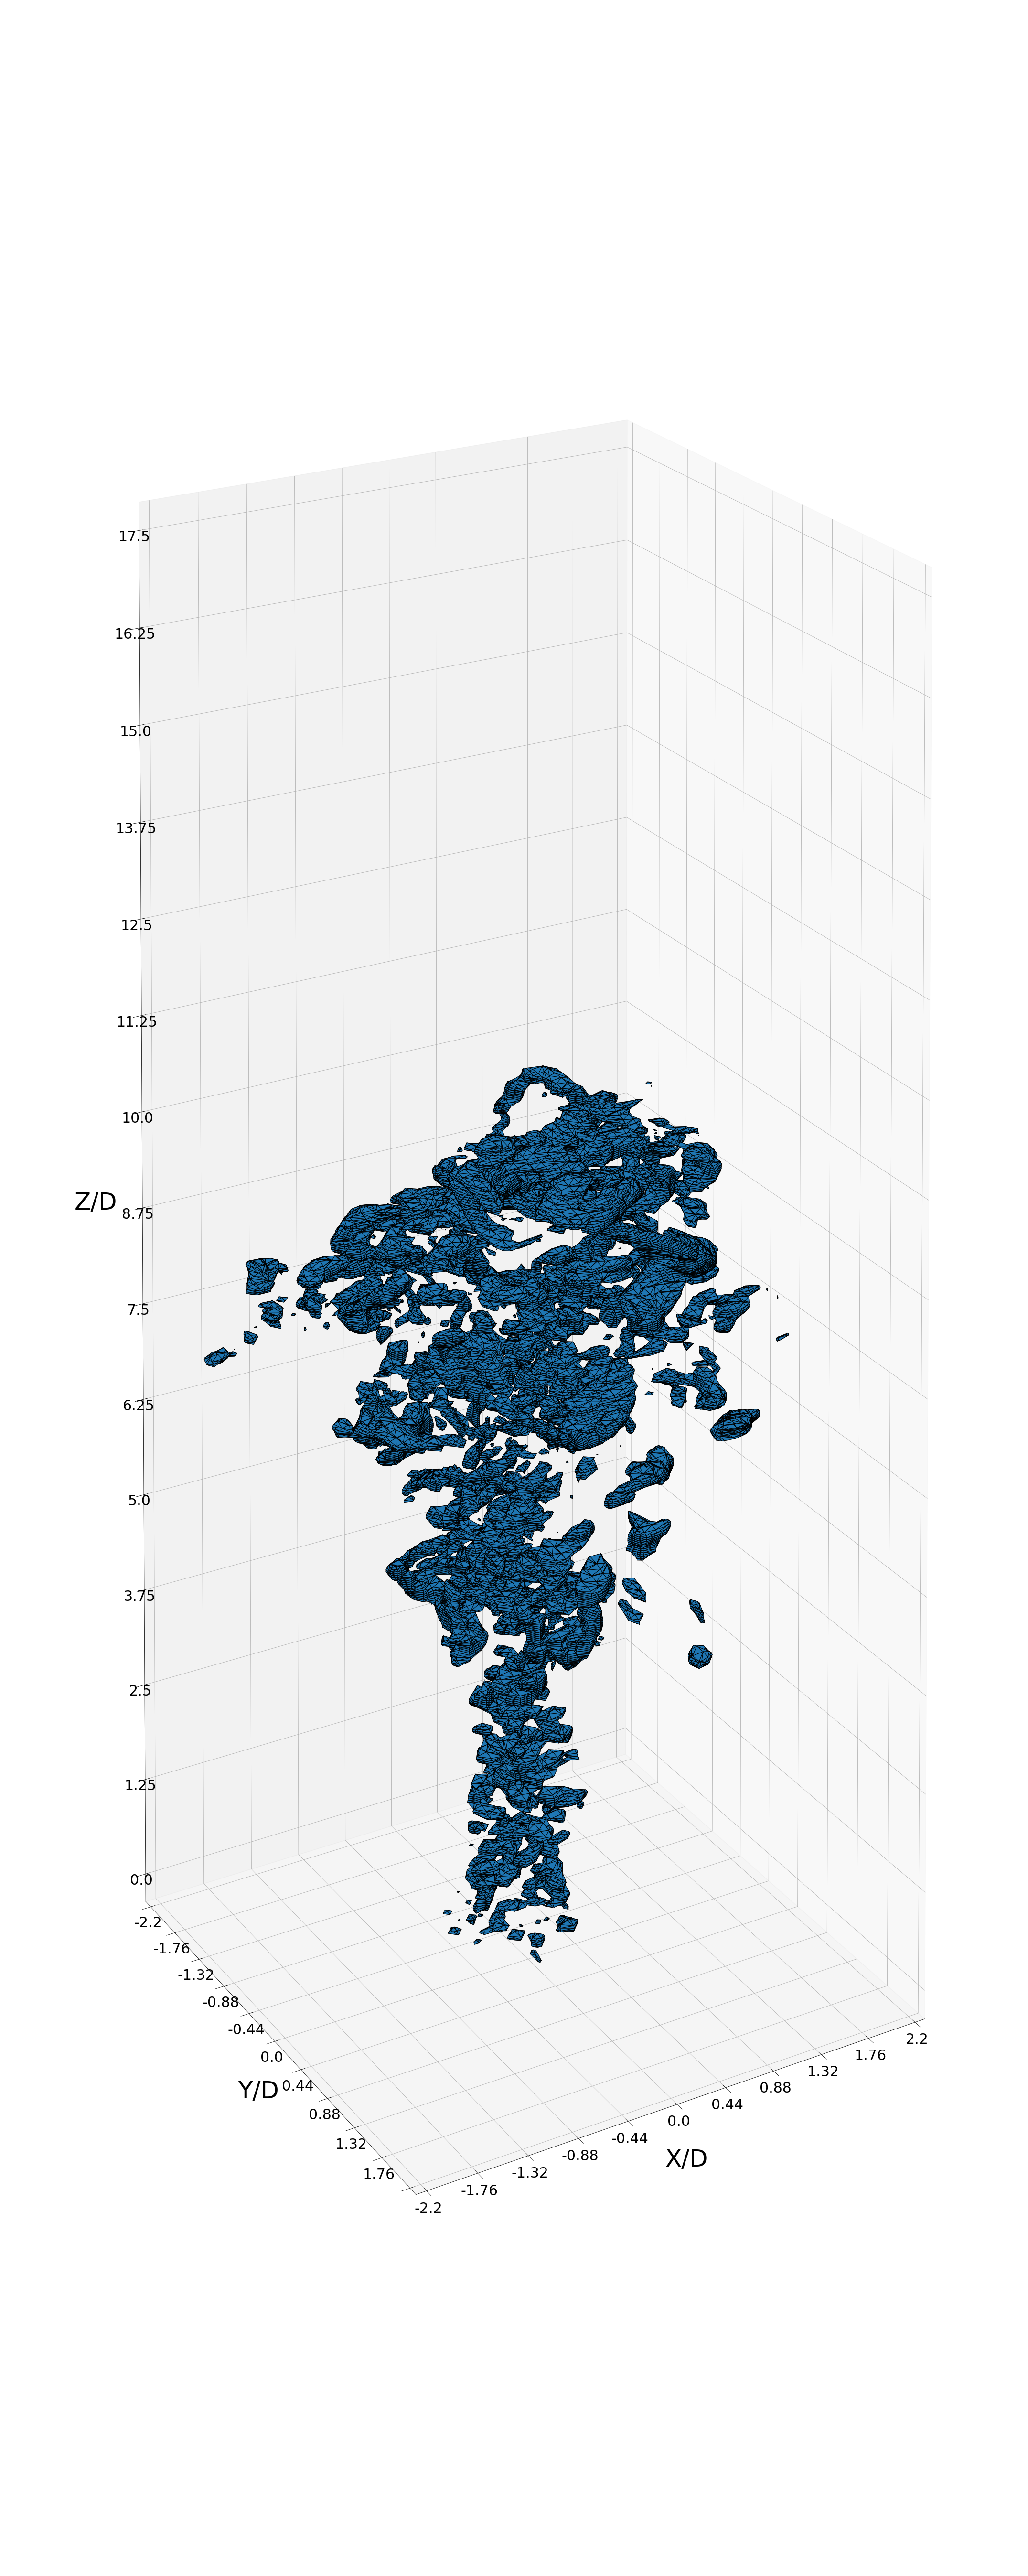

In [184]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib import animation
from skimage import measure
import time

D =400
isovalue = 0.52 #omega
isovalue = -np.exp(-9) #lamda2
def isosurface(data, t, isovalue, figsize =30):
    
    fig = plt.figure(figsize=(figsize, figsize*2.5))
    camera = Camera(fig)
    ax = fig.add_subplot(111, projection='3d')

    for i in range(5):
        vol = data[:,:,:,i*10]
        verts, faces, _, _ = measure.marching_cubes_lewiner(vol, isovalue, spacing=(dx, dy, dz))
        mesh = Poly3DCollection(verts[faces])
        mesh.set_edgecolor('k')
        ax.add_collection3d(mesh)
        ax.view_init(10,60)

        ax.set_xlabel("X/D",fontsize = 50,labelpad=40)
        ax.set_ylabel("Y/D",fontsize = 50,labelpad=40)
        ax.set_zlabel("Z/D",fontsize = 50,labelpad=100)

        ticnum = 11
        ticnumz = 14
        xaxis = []
        for x in range (np.int(-(ticnum-1)/2),np.int((ticnum+1)/2)):
            xaxis.append(((nx-1)*dx/(ticnum-1)*x)/D)
        yaxis = []
        for y in range (np.int(-(ticnum-1)/2),np.int((ticnum-1)/2)):
            yaxis.append(((ny-1)*dy/(ticnum-1)*y)/D)
        zaxis = []
        for z in range (0,np.int((ticnumz+1))):
            zaxis.append(z*(dz*nz/ticnumz)/D)
        ax.set_xticks(np.linspace(0, nx*dx, ticnum))
        ax.set_yticks(np.linspace(0, ny*dy, ticnum))
        ax.set_xticklabels(xaxis)
        ax.set_yticklabels(yaxis)
        ax.invert_yaxis()
        ax.set_zticks(np.linspace(0, nz*dz, ticnumz+1))
        ax.set_zticklabels(zaxis)
        ax.tick_params(axis='both', which='major', labelsize=30)

        plt.tight_layout()
        camera.snap()
    #     plt.savefig(np.str(t)+'.jpg')
    animation = camera.animate()  
    animation.save('celluloid_subplots.gif', writer = 'imagemagick')

t = 15
isosurface(omega,t,isovalue)